In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, tree
import matplotlib.pyplot as plt
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

path_train = '/home/fraga/Documents/Kaggle-Competitions/Titanic/titanic/train.csv'
path_test = '/home/fraga/Documents/Kaggle-Competitions/Titanic/titanic/test.csv'

In [2]:
train_df = pd.read_csv(path_train, index_col = 'PassengerId')
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
def process_train(df):
    y_train = df["Survived"]
    del df["Survived"]
    del df["Name"]
    del df["Cabin"]
    
    # Fill nas
    df["Embarked"].fillna(method = 'ffill', inplace = True)
    age_mean = np.nanmean(np.asarray(df["Age"]))
    df["Age"].fillna(value = age_mean, inplace = True)
    
    # Encode labels
    label_cols = ['Sex','Ticket', 'Embarked']    
    encoder = LabelEncoder()
    encoded = df[label_cols].apply(encoder.fit_transform)
    
    data = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].join(encoded)
    
    #age_mean = np.mean(df['Age'])
    #age_sd = np.std(df['Age'])
    #data['Age'] = (data['Age'] - age_mean) / age_sd
    
    fare_mean = np.mean(df['Fare'])
    fare_sd = np.std(df['Fare'])
    data['Fare'] = (data['Fare'] - fare_mean) / fare_sd
    
    return data, y_train

In [5]:
train_df, y_train = process_train(train_df)
train_df.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Embarked
PassengerId,,,,,,,,
1,3,22.000000,1,0,-0.502445,1,523,2
2,1,38.000000,1,0,0.786845,0,596,0
3,3,26.000000,0,0,-0.488854,0,669,2
4,1,35.000000,1,0,0.420730,0,49,2
5,3,35.000000,0,0,-0.486337,1,472,2
6,3,29.699118,0,0,-0.478116,1,275,1
7,1,54.000000,0,0,0.395814,1,85,2
8,3,2.000000,3,1,-0.224083,1,395,2
9,3,27.000000,0,2,-0.424256,0,344,2


In [6]:
train_df.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

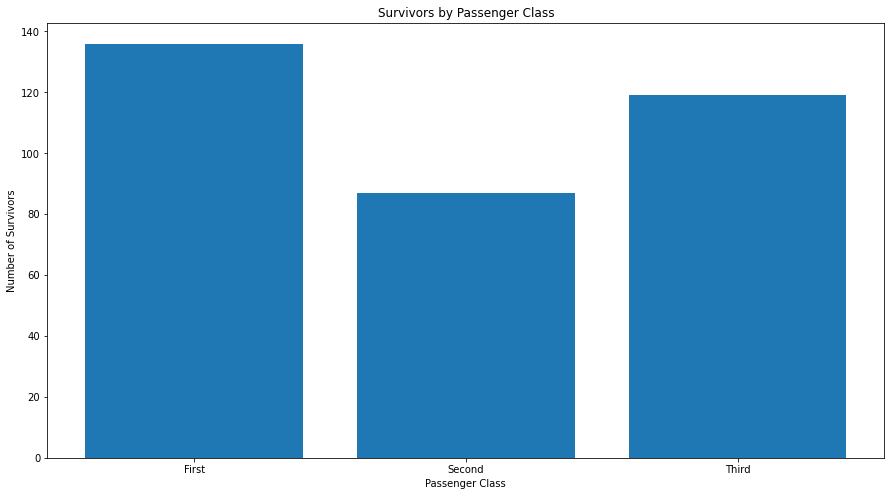

In [7]:
pclass = np.asarray(train_df["Pclass"])
survived = np.asarray(y_train)
heights = np.zeros(3)

for i in range(survived.shape[0]):
    if(survived[i] == 1):
        heights[pclass[i] - 1] += 1

plt.rcParams['figure.figsize'] = (15, 8)
plt.bar([1, 2, 3], heights)
plt.xticks([1, 2, 3], ['First', 'Second', 'Third'])
plt.title("Survivors by Passenger Class")
plt.ylabel('Number of Survivors')
plt.xlabel('Passenger Class')
plt.show()

In [9]:
test_df = pd.read_csv(path_test, index_col = 'PassengerId')
test_df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [10]:
test_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [11]:
def process_test(df):
    del df["Name"]
    del df["Cabin"]
    
    age_mean = np.nanmean(np.asarray(df["Age"]))
    df["Age"].fillna(value = age_mean, inplace = True)
    
    fare_mean = np.nanmean(np.asarray(df["Fare"]))
    df["Fare"].fillna(value = fare_mean, inplace = True)
    
    # Encode labels
    label_cols = ['Sex','Ticket', 'Embarked']    
    encoder = LabelEncoder()
    encoded = df[label_cols].apply(encoder.fit_transform)
    
    data = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].join(encoded)
    
    #age_mean = np.mean(df['Age'])
    #age_sd = np.std(df['Age'])
    #data['Age'] = (data['Age'] - age_mean) / age_sd
    
    fare_mean = np.mean(df['Fare'])
    fare_sd = np.std(df['Fare'])
    data['Fare'] = (data['Fare'] - fare_mean) / fare_sd
    
    return data

In [12]:
test_df = process_test(test_df)
test_df.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [13]:
test_df.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Embarked
PassengerId,,,,,,,,
892,3,34.5,0,0,-0.498407,1,152,1
893,3,47.0,1,0,-0.513274,0,221,2
894,2,62.0,0,0,-0.465088,1,73,1
895,3,27.0,0,0,-0.483466,1,147,2
896,3,22.0,1,1,-0.418471,0,138,2
897,3,14.0,0,0,-0.473381,1,261,2
898,3,30.0,0,0,-0.501993,0,158,1
899,2,26.0,1,1,-0.118823,1,84,2
900,3,18.0,0,0,-0.509165,0,100,0


In [15]:
def make_submission(train_df, y_train, test_df, arch):
    if(arch == 'svm'):
        model = svm.SVC(kernel = 'poly', degree = 2)
    elif(arch == 'rf'):
        model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
    
    model.fit(train_df, y_train)
    
    predictions = model.predict(test_df)
    submision = []

    for predict in predictions:
        if(predict > 0.5):
            submision.append(1)

        else:
            submision.append(0)

    ind = [i for i in range(892, 1310)]
    
    data = {'PassengerId': ind,
        'Survived': submision
    }

    result = pd.DataFrame(data, columns = ['PassengerId', 'Survived'])
    result.to_csv('number 20.csv', index = False)

In [16]:
make_submission(X, y_train, Xt, 'rf')